In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"E:\DataScience-data\Bank_churn_modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [9]:
df.shape

(10000, 11)

In [10]:
df.head().T

,0,1,2,3,4
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0,83807.9,159661,0,125511
NumOfProducts,1,1,3,2,1
HasCrCard,1,0,1,0,1
IsActiveMember,1,1,0,0,1
EstimatedSalary,101349,112543,113932,93826.6,79084.1


In [11]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [17]:
a=[ 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
b=['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts',  'EstimatedSalary']

In [18]:
#univariate

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


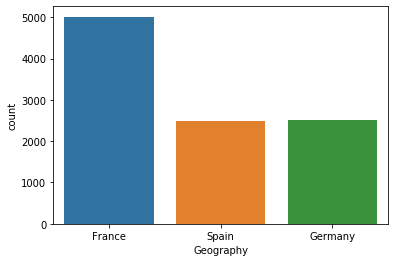

Male      5457
Female    4543
Name: Gender, dtype: int64


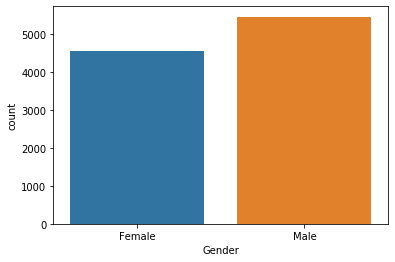

1    7055
0    2945
Name: HasCrCard, dtype: int64


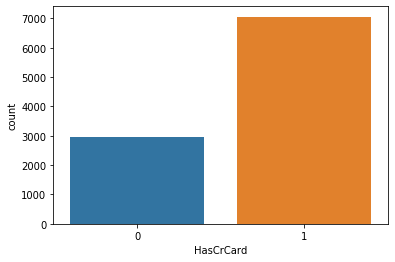

1    5151
0    4849
Name: IsActiveMember, dtype: int64


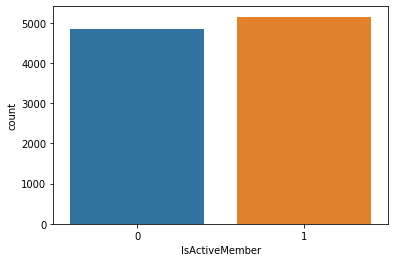

0    7963
1    2037
Name: Exited, dtype: int64


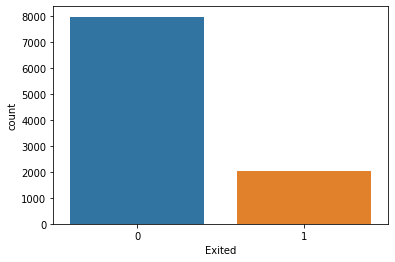

In [19]:
for i in a:
    print(df[i].value_counts())
    sns.countplot(x=i,data=df)
    plt.show()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
-0.07160660820092675


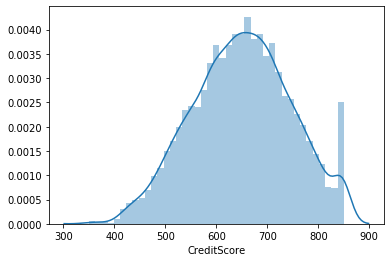

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64
1.0113202630234552


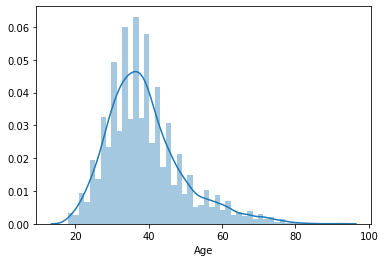

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64
0.01099145797717904


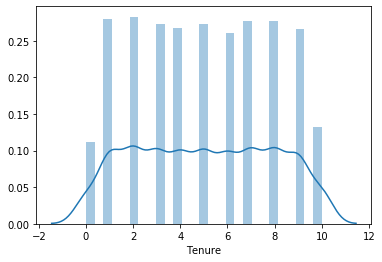

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64
-0.14110871094154384


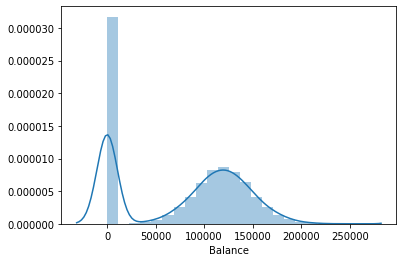

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64
0.7455678882823168


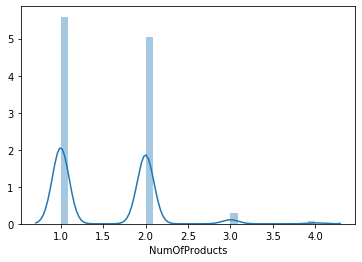

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64
0.0020853576615585162


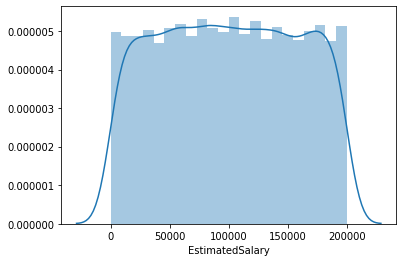

In [20]:
for i in b:
    print(df[i].describe())
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()

In [21]:
#bivariate

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64


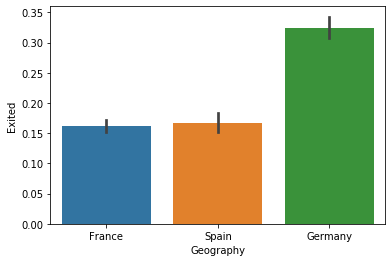

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64


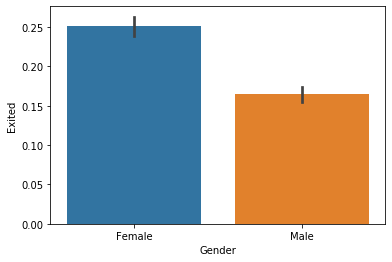

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64


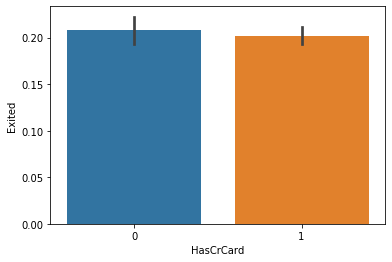

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
IsActiveMember
0      0.268509
1      0.142691
All    0.203700
dtype: float64


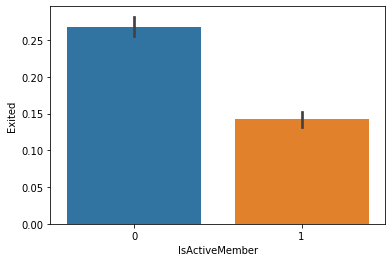

Exited     0     1    All
Exited                   
0       7963     0   7963
1          0  2037   2037
All     7963  2037  10000
Exited
0      0.0000
1      1.0000
All    0.2037
dtype: float64


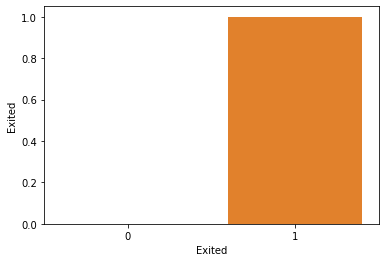

In [22]:
for i in a:
    new=pd.crosstab(df[i],df["Exited"],margins=True)
    print(new)
    print(new[1]/new["All"])
    sns.barplot(x=i,y="Exited",data=df)
    plt.show()

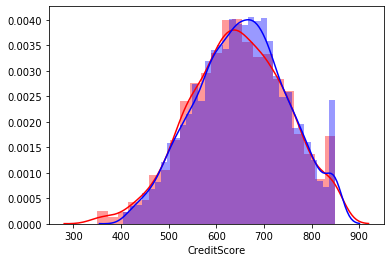

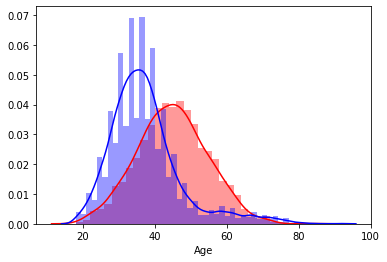

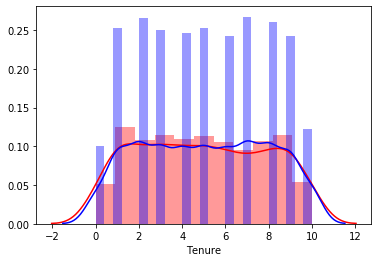

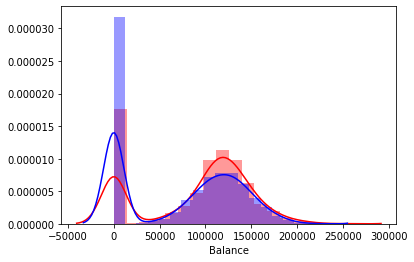

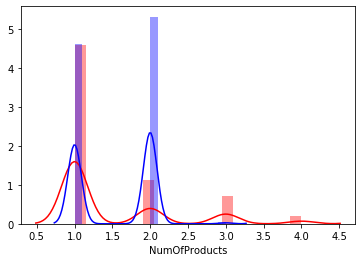

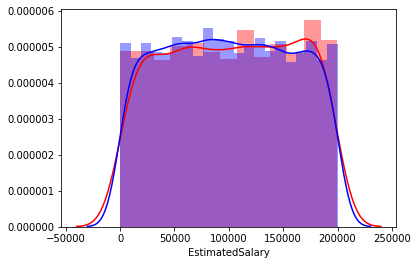

In [23]:
for i in b:
    sns.distplot(df[i][df["Exited"]==1],color='r')
    sns.distplot(df[i][df["Exited"]==0],color='b')
    plt.show()
    

In [24]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [25]:
df1=df.drop(['HasCrCard','EstimatedSalary','Tenure',],axis=1)

In [26]:
df1.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0


In [27]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [42]:
x=df1.drop("Exited",axis=1)

In [43]:
y=df1["Exited"]

In [44]:
l1=LabelEncoder()


In [45]:
x["Gender"]=l1.fit_transform(x["Gender"])

In [46]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,0,42,0.00,1,1
1,608,Spain,0,41,83807.86,1,1
2,502,France,0,42,159660.80,3,0
3,699,France,0,39,0.00,2,0
4,850,Spain,0,43,125510.82,1,1


In [47]:
encoder=ColumnTransformer([('sc',StandardScaler(),[0,3,4,5]),
                           ('one',OneHotEncoder(),[1])],remainder='passthrough')

In [48]:
x1=encoder.fit_transform(x)


In [49]:
x1=pd.DataFrame(x1)

In [50]:
x1.head()

,0,1,2,3,4,5,6,7,8
0,-0.326221,0.293517,-1.225848,-0.911583,1.0,0.0,0.0,0.0,1.0
1,-0.440036,0.198164,0.117350,-0.911583,0.0,0.0,1.0,0.0,1.0
2,-1.536794,0.293517,1.333053,2.527057,1.0,0.0,0.0,0.0,0.0
3,0.501521,0.007457,-1.225848,0.807737,1.0,0.0,0.0,0.0,0.0
4,2.063884,0.388871,0.785728,-0.911583,0.0,0.0,1.0,0.0,1.0


In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,train_size=0.8)

In [52]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(8000, 9)
(8000,)
(2000, 9)
(2000,)


In [53]:
from sklearn.linear_model import LogisticRegression
algo=LogisticRegression()
algo.fit(xtrain,ytrain)
ypred=algo.predict(xtest)

In [54]:
from  sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[1535   58]
 [ 312   95]]
0.815


In [55]:
import joblib

In [57]:
joblib.dump(algo,r"E:\DataScience-data\algo\bank-model.pkl")
joblib.dump(encoder,r"E:\DataScience-data\algo\bank-model-encoder.pkl")

['E:\\DataScience-data\\algo\\bank-model-encoder.pkl']